# Auto encoder

In [12]:
import numpy as np 
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected
print(tf.__version__)

1.15.2


In [13]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X = X[y<3, :3]
y = y[y<3]
print(X.shape)
print(y.shape)


(150, 3)
(150,)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [15]:
n_inputs = 3
n_hidden = 2
n_outputs = n_inputs
learning_rate = 0.01

In [16]:
X = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden = fully_connected(X, n_hidden, activation_fn=None)
outputs = fully_connected(hidden, n_outputs, activation_fn=None)


In [17]:
reconstruction_loss = tf.reduce_mean(tf.square(outputs - X))
optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(reconstruction_loss)

In [18]:
init = tf.global_variables_initializer()

In [19]:
n_iterations = 1000
codings = hidden 

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        training_op.run(feed_dict={X: X_train})
    codings_val = codings.eval(feed_dict={X: X_test})

In [21]:
pred = codings_val

In [22]:
print(pred)

[[-7.268182  -5.6300664]
 [-7.979379  -4.8206477]
 [-2.0891564 -5.8451867]
 [-5.0044093 -4.8272257]
 [-6.518688  -5.1191196]
 [-7.0760894 -5.0511   ]
 [-5.561047  -5.393378 ]
 [-5.3131127 -4.259865 ]
 [-1.6871707 -5.664464 ]
 [-1.5341376 -5.7716913]
 [-1.4566206 -5.7375197]
 [-4.8516307 -4.723064 ]
 [-6.749874  -4.5175877]
 [-1.6295481 -6.589651 ]
 [-6.5965867 -4.8362055]
 [-3.949231  -4.2136493]
 [-1.1703211 -7.0170302]
 [-6.1550326 -4.392069 ]
 [-6.539854  -5.0215263]
 [-5.9843264 -5.3708124]
 [-6.749874  -4.5175877]
 [-4.5063777 -4.35702  ]
 [-5.8674955 -4.861836 ]
 [-6.7680216 -5.0899854]
 [-4.680322  -4.363589 ]
 [-1.4954257 -6.635105 ]
 [-6.0598426 -5.229413 ]
 [-6.8266277 -5.18593  ]
 [-6.194219  -4.972568 ]
 [-4.583386  -4.813972 ]
 [-6.3469987 -5.076731 ]
 [-5.349408  -5.4046607]
 [-4.6968513 -4.44333  ]
 [-5.463382  -4.611238 ]
 [-1.3808501 -6.0903096]
 [-5.601252  -5.1283154]
 [-5.2740192 -5.440365 ]
 [-1.3804685 -6.4073954]]


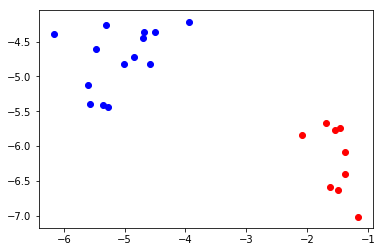

In [23]:
plt.scatter(pred[y_test==0, 0], pred[y_test==0, 1], color='red')
plt.scatter(pred[y_test==1, 0], pred[y_test==1, 1], color='blue')
plt.show()